<a href="https://colab.research.google.com/github/ryamaguchi0111/signate_The-4th-Tellus-Satellite-Challenge/blob/master/001_check_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ここ](https://signate.jp/competitions/284/discussions/tiff-1)を参考に可視化

In [5]:
from google.colab import drive
drive.mount('/content/drive'

Mounted at /content/drive


In [1]:
DATA_PATH = '/content/drive/My Drive/signate/The-4th-Tellus-Satellite-Challenge/data/'
OUTPUT_PATH = '/content/drive/My Drive/signate/The-4th-Tellus-Satellite-Challenge/output/'

In [16]:
import json
import pickle

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageFilter



import tifffile
from tqdm.auto import tqdm

In [3]:
# データの読み込み
idx = 0
data = tifffile.imread(f'{DATA_PATH}train_images/train_{idx:02d}.tif')
with open(f'{DATA_PATH}train_annotations/train_{idx:02d}.json', 'r') as fp:
    annotation = json.load(fp)

In [4]:
# データの型、サイズの確認
type(data), data.shape

(numpy.ndarray, (2914, 5925))

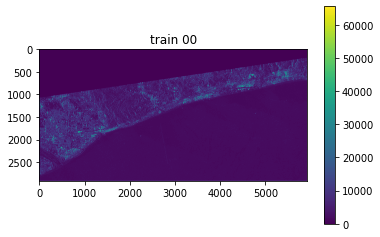

In [5]:
# プロット
plt.title(f'train {idx:02d}')
plt.imshow(data)
plt.colorbar()
plt.show()

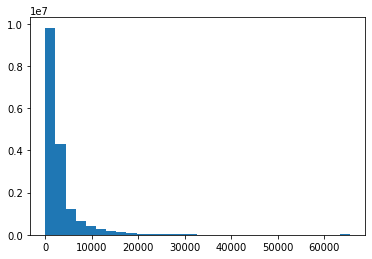

In [6]:
# 輝度のヒストグラム
plt.hist(data.flatten(), bins=30)
plt.show()

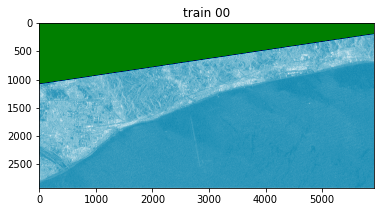

In [7]:
# ログスケールで可視化
plt.title(f'train {idx:02d}')
plt.imshow(np.log2(data + 1.0e-1), cmap='ocean')
plt.show()

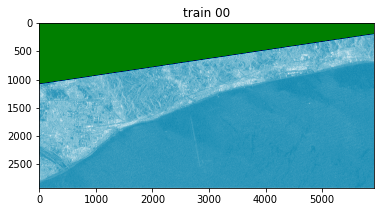

In [8]:
# ログスケールで可視化
plt.title(f'train {idx:02d}')
plt.imshow(np.log10(data + 1.0e-1), cmap='ocean')
plt.show()

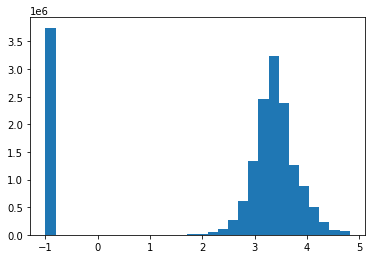

In [9]:
# 輝度のヒストグラム
plt.hist(np.log10(data+1.0e-1).flatten(), bins=30)
plt.show()

In [10]:
annotation.keys()

dict_keys(['coastline_points', 'validate_lines'])

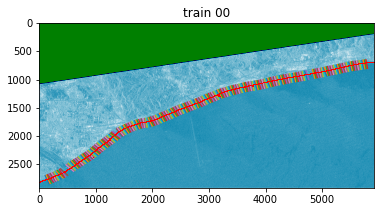

In [11]:
# annotationデータのプロット
plt.title(f'train {idx:02d}')
plt.imshow(np.log10(data + 1.0e-1), cmap='ocean')
for line in annotation['validate_lines']:
    ix = [line[i][0] for i in range(2)]
    iy = [line[i][1] for i in range(2)]
    plt.plot(ix, iy)
for point in annotation['coastline_points']:
    plt.plot(point[0], point[1], ',', color='red')
plt.show()

In [15]:
data.shape

(4259, 9101)

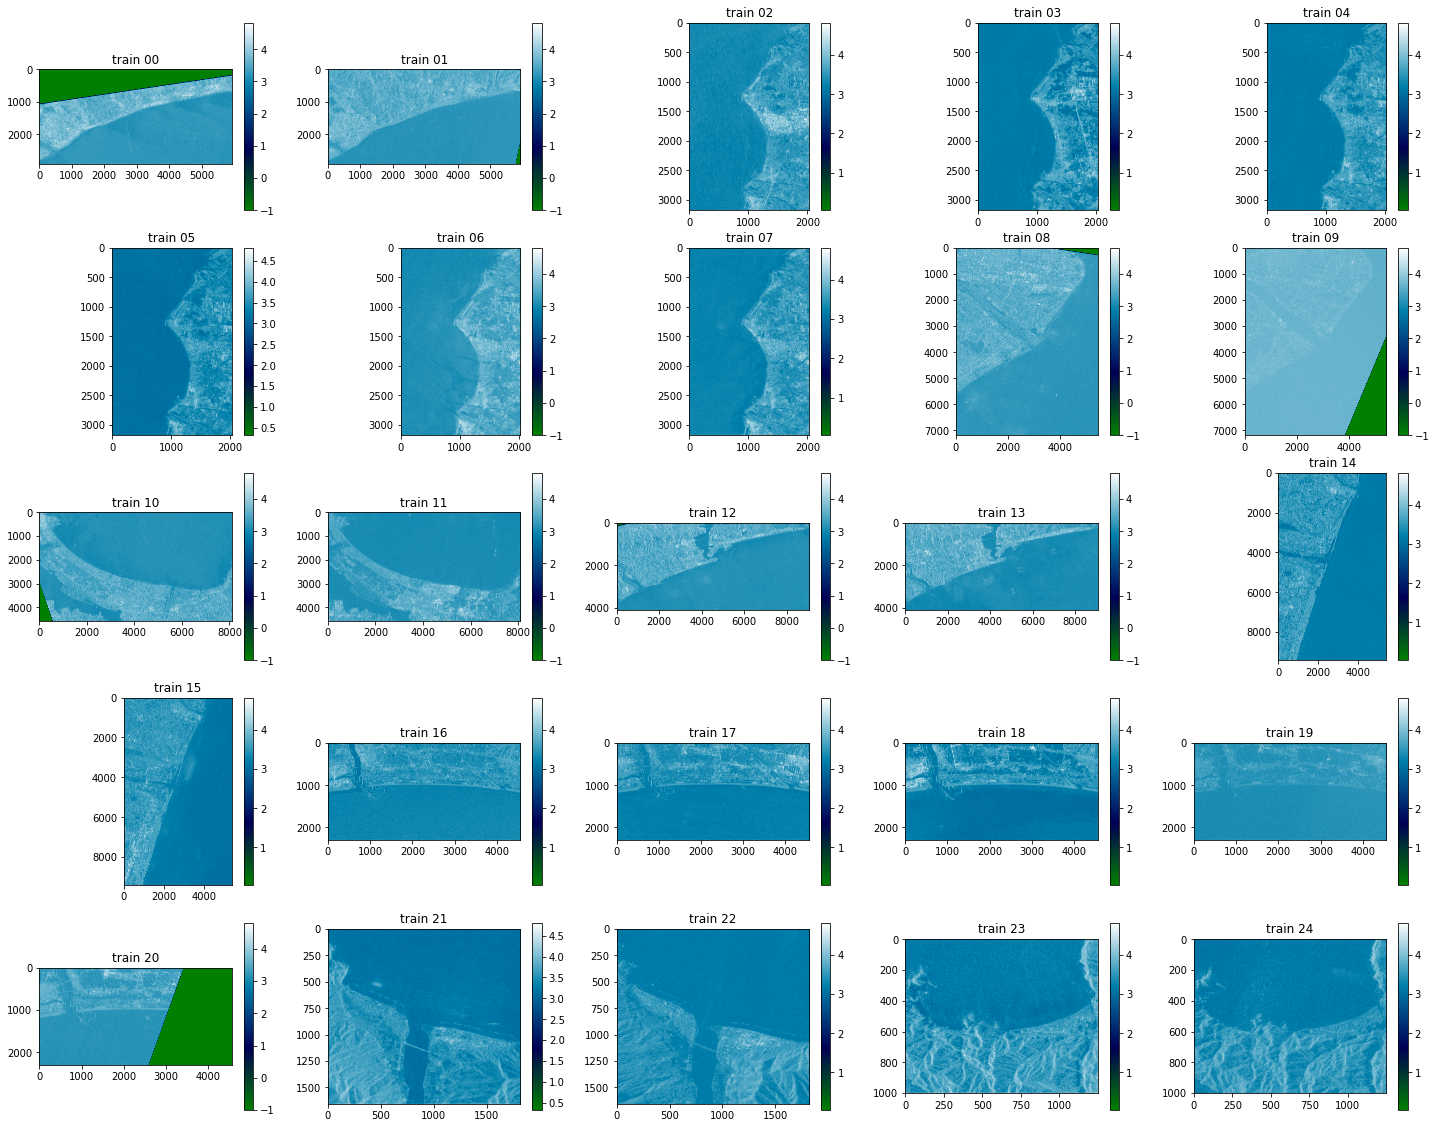

In [12]:
# trainデータの全体の可視化
plt.figure(figsize=(5*5, 5*4))
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.title(f'train {idx:02d}')
    data = tifffile.imread(f'{DATA_PATH}train_images/train_{idx:02d}.tif')
    plt.imshow(np.log10(data+1.0e-1), cmap='ocean')
    plt.colorbar()
    plt.savefig(f'{DATA_PATH}train_images/train_{idx:02d}.png')
plt.savefig(f'{OUTPUT_PATH}train_image.png')
plt.show()

In [ ]:
data = annotation['coastline_points']
for i in range(0, len(data)):
    print(data[i][0], data[i][0])

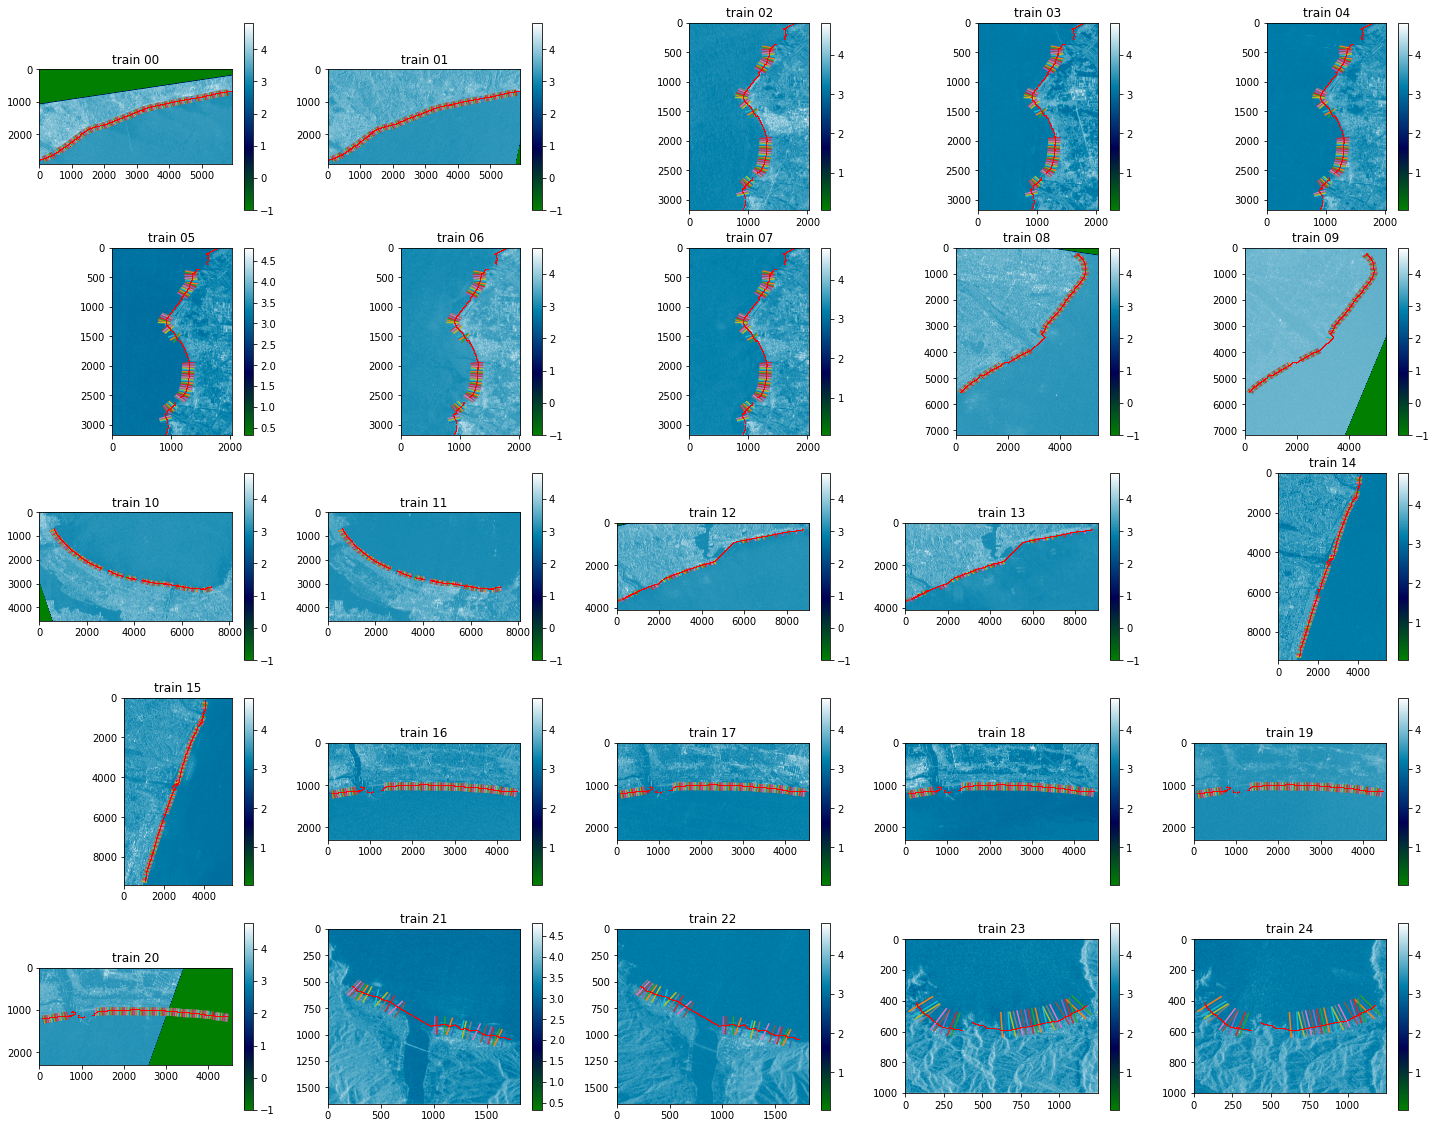

In [13]:
# annotationしたtrainデータの可視化
# trainデータの全体の可視化
plt.figure(figsize=(5*5, 5*4))
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.title(f'train {idx:02d}')
    data = tifffile.imread(f'{DATA_PATH}train_images/train_{idx:02d}.tif')
    with open(f'{DATA_PATH}train_annotations/train_{idx:02d}.json', 'r') as fp:
        annotation = json.load(fp)
    plt.imshow(np.log10(data+1.0e-1), cmap='ocean')
    for line in annotation['validate_lines']:
        ix = [line[i][0] for i in range(2)]
        iy = [line[i][1] for i in range(2)]
        plt.plot(ix, iy)
    for point in annotation['coastline_points']:
        plt.plot(point[0], point[1], ',', color='red')
    plt.colorbar()
plt.savefig(f'{OUTPUT_PATH}train_image_with_annotate.png')
plt.show()

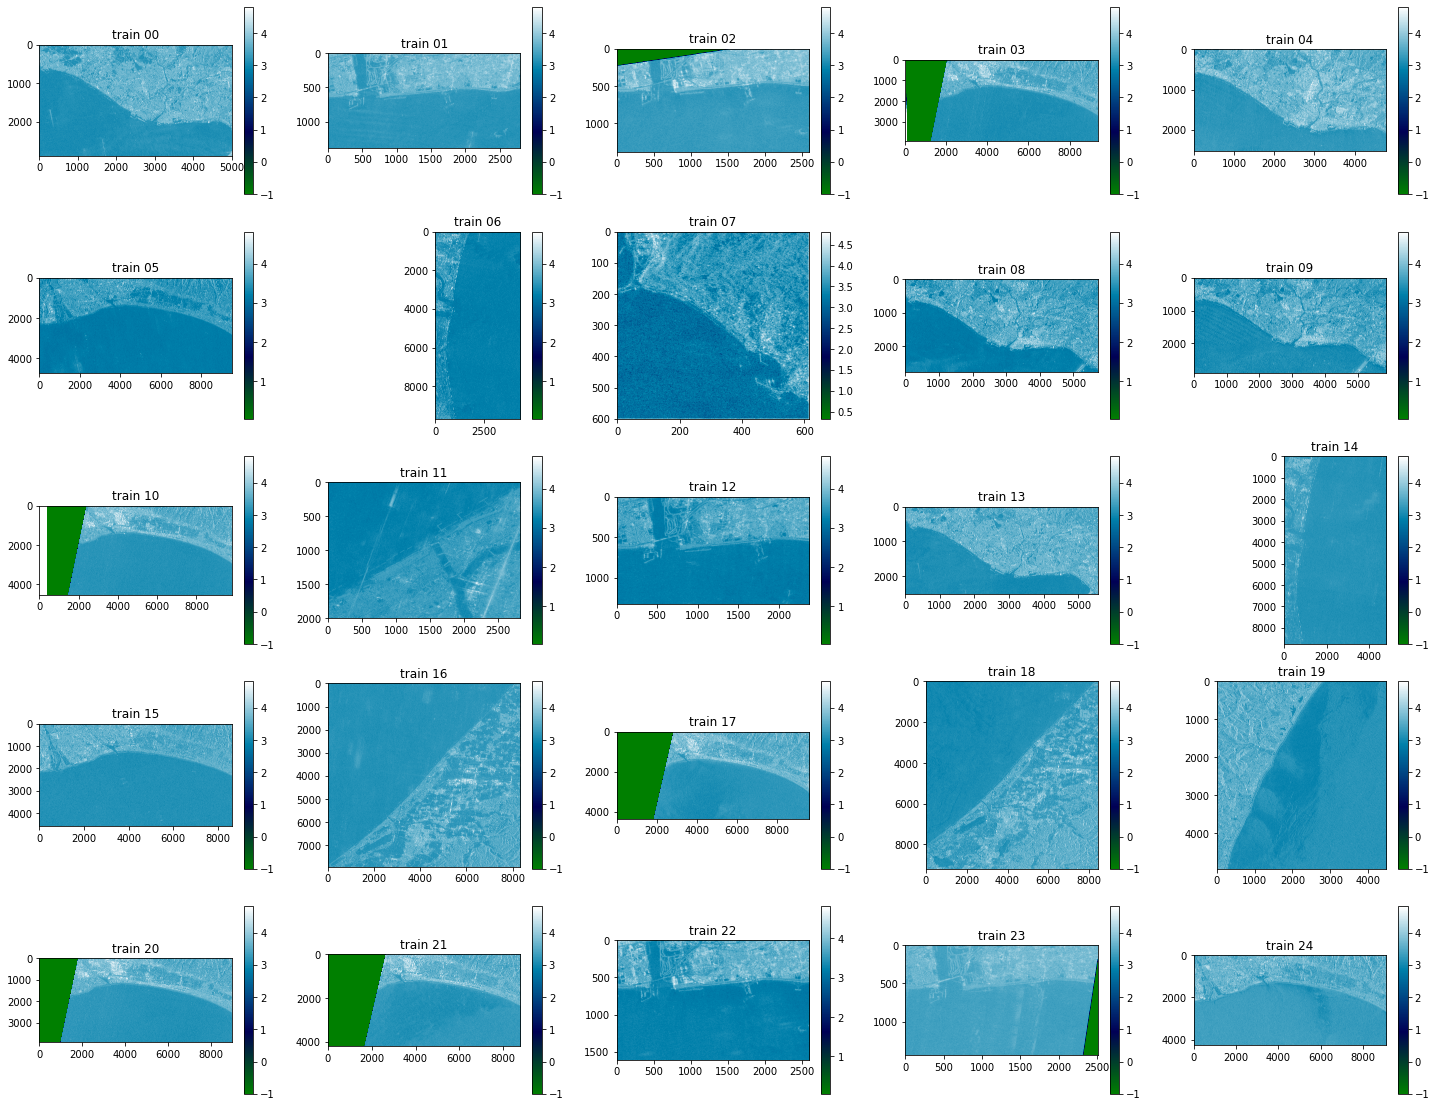

In [14]:
# testデータ全体の可視化
plt.figure(figsize=(5*5, 5*4))
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.title(f'train {idx:02d}')
    data = tifffile.imread(f'{DATA_PATH}test_images/test_{idx:02d}.tif')
    plt.imshow(np.log10(data+1.0e-1), cmap='ocean')
    plt.colorbar()
plt.savefig(f'{OUTPUT_PATH}test_image.png')
plt.show()

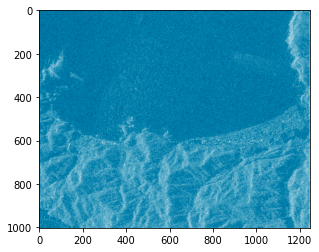

In [25]:
# trainデータをpngにして保存
path_out = DATA_PATH + 'train_images'
for idx in range(25):
    data = tifffile.imread(f'{DATA_PATH}train_images/train_{idx:02d}.tif')
    plt.imshow(np.log10(data+1.0e-1), cmap='ocean')
    pilimg = Image.fromarray(np.uint8(data))
    pilimg.save(f'{DATA_PATH}train_images/train_{idx:02d}.png')

In [11]:
path_imgs = DATA_PATH + 'train_images/'
path_json = DATA_PATH + 'train_annotations/'
path_out = OUTPUT_PATH + 'train_images_inpainted_labels/'

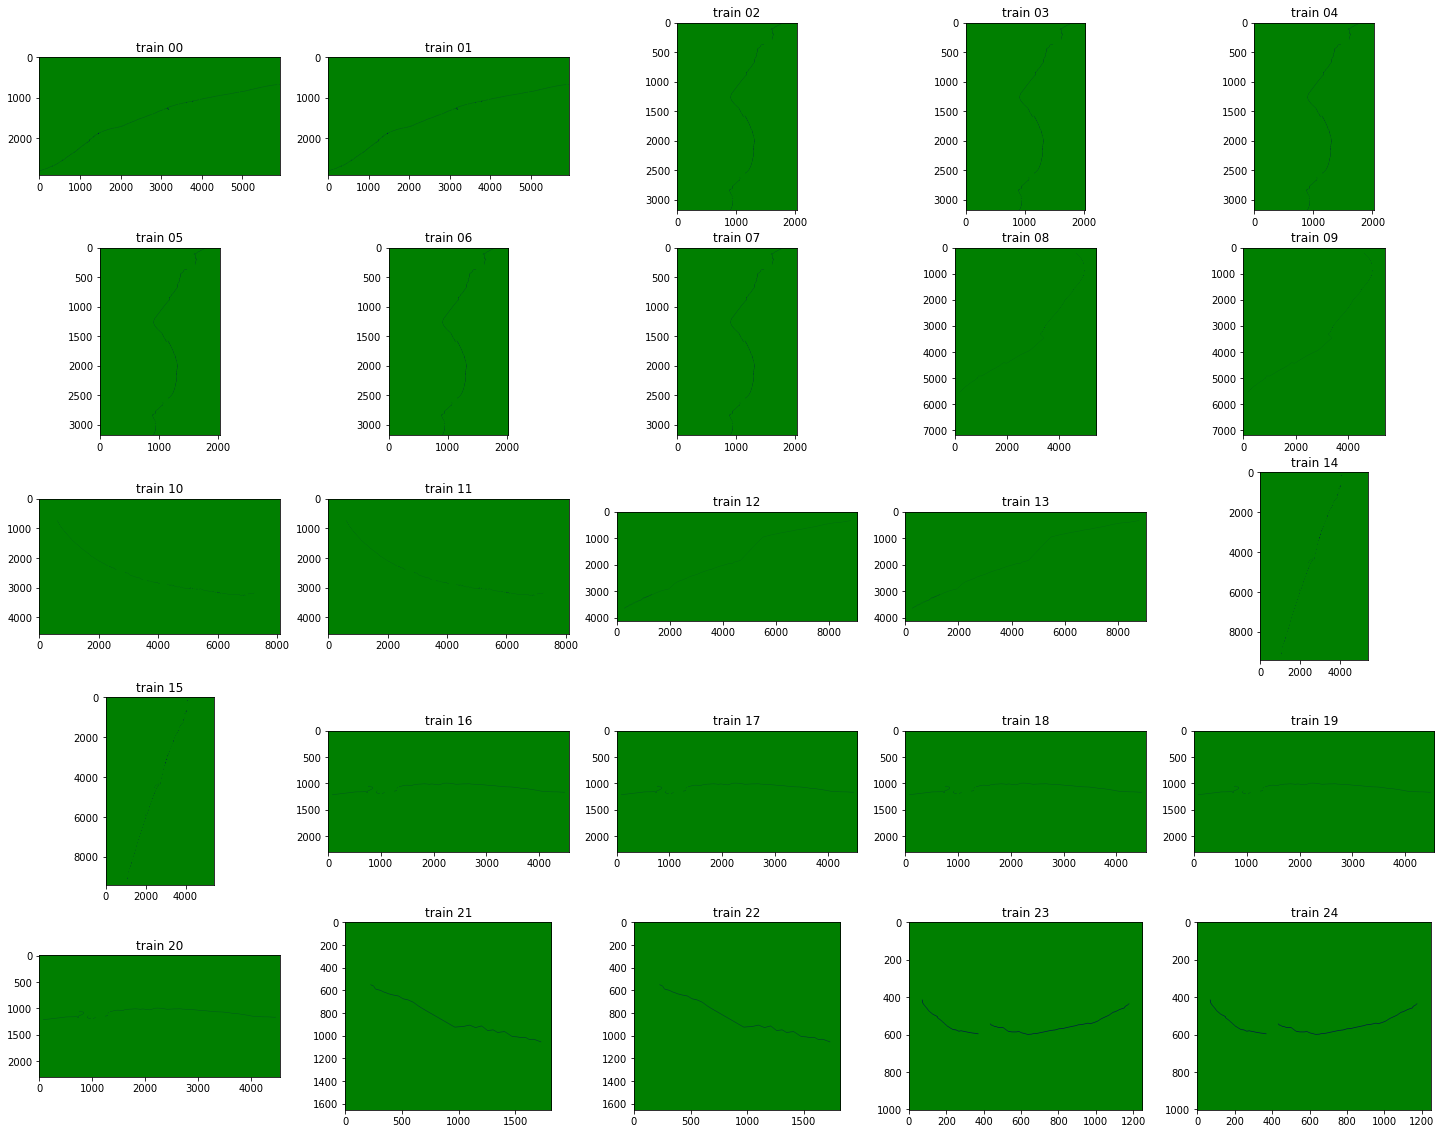

In [17]:
# annotationしたtrainデータの可視化
# 海岸線のマスクデータをpngにして保存
plt.figure(figsize=(5*5, 5*4))
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.title(f'train {idx:02d}')
    data = tifffile.imread(f'{DATA_PATH}train_images/train_{idx:02d}.tif')
    with open(f'{DATA_PATH}train_annotations/train_{idx:02d}.json', 'r') as fp:
        annotation = json.load(fp)
    plt.imshow(np.log10(data+1.0e-1), cmap='ocean')
    # for line in annotation['validate_lines']:
        # ix = [line[i][0] for i in range(2)]
        # iy = [line[i][1] for i in range(2)]
        # plt.plot(ix, iy)
    data[...] = 0
    for point in annotation['coastline_points']:
        data[point[1], point[0]] = 1
    plt.imshow(np.log10(data+1.0e-1), cmap='ocean')
    pilimg = Image.fromarray(np.uint8(data))
    pilimg.save(f'{path_out}label_{idx:02d}.png')
        # plt.plot(point[0], point[1], ',', color='red')
    # plt.colorbar()
# plt.savefig(f'{OUTPUT_PATH}train_image_with_annotate.png')
plt.show()